# Regressão Linear Simples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
plt.style.use('ggplot')

### Leitura dos dados (dados hipotéticos)
- X representa os $m^2$ do apartamento que possuem uma variação de 40 $m^2$ até 120 $m^2$
- y é o preço do apartamento

In [3]:
X = np.random.randint(low=40,high=120, size=(20,1))
y = (3 * X + np.random.randint(low=100,high=150, size=(20,1))) * 1000

Text(0, 0.5, 'Preço')

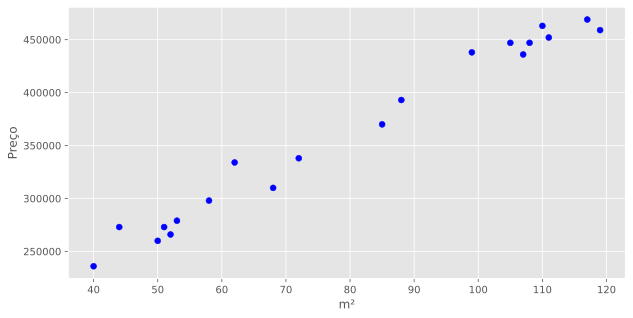

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X,y, c='b')
plt.xlabel("m²")
plt.ylabel("Preço")

### Representando uma Reta

In [6]:
def predict(alpha, beta, X):
    return alpha*X + beta

## Escolhendo melhor alpha e beta

In [7]:
tamanho = len(X)
X_b = np.c_[np.ones((tamanho, 1)), X]  # add x0 = 1 to each instance
X_b

array([[  1.,  88.],
       [  1.,  44.],
       [  1., 105.],
       [  1.,  52.],
       [  1., 111.],
       [  1., 107.],
       [  1., 119.],
       [  1.,  58.],
       [  1.,  99.],
       [  1.,  68.],
       [  1., 110.],
       [  1.,  72.],
       [  1., 108.],
       [  1.,  62.],
       [  1.,  53.],
       [  1.,  51.],
       [  1., 117.],
       [  1.,  50.],
       [  1.,  40.],
       [  1.,  85.]])

### Métodos dos Mínimos Quadrados

De maneira matricial o vetor dos coeficientes ($\tilde{\beta}$) que minimiza o erro ao quadrado para o MMQ é dado por 

* $\tilde{\beta}=(X^TX)^1X^Ty$

In [13]:
#métodos dos mínimos quadrados
beta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

### Ajustando a reta

In [14]:
alpha = beta_best[1] #inclinação
beta = beta_best[0]

In [15]:
ỹ = predict(alpha=alpha, beta=beta, X=X)

### Plotando os Dados

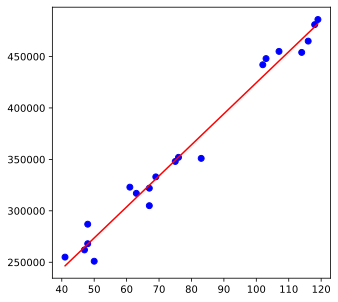

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

### Como implementar uma regressão linear usando o Scikit-learn?

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X, y)

LinearRegression()

In [19]:
ỹ = lr.predict(X)

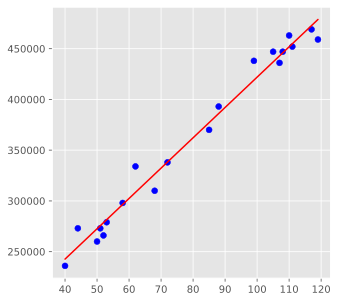

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

In [22]:
print("Training score: {:.2f}".format(lr.score(X, y)))

Training score: 0.98


## Avaliando meu modelo de regressão

In [23]:
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y, ỹ))
print('MSE:', metrics.mean_squared_error(y, ỹ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, ỹ)))
print('R2:', np.sqrt(metrics.r2_score(y, ỹ)))

MAE: 9381.69280142297
MSE: 139053465.19636407
RMSE: 11792.093333940504
R2: 0.9894315384037704
